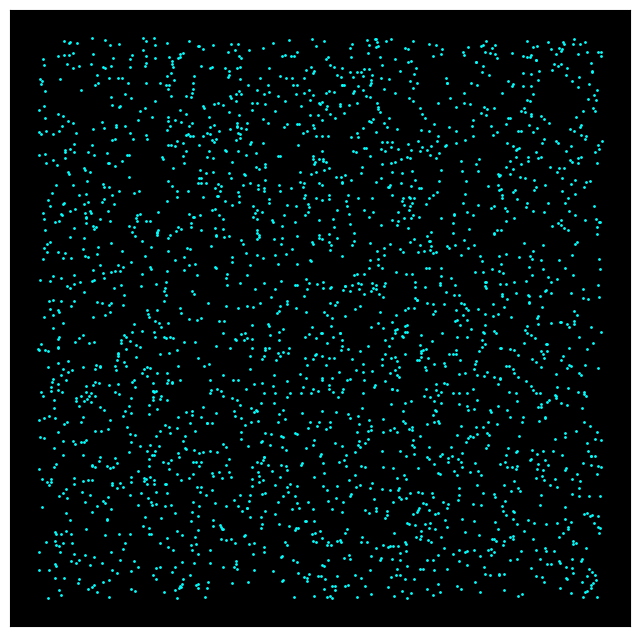

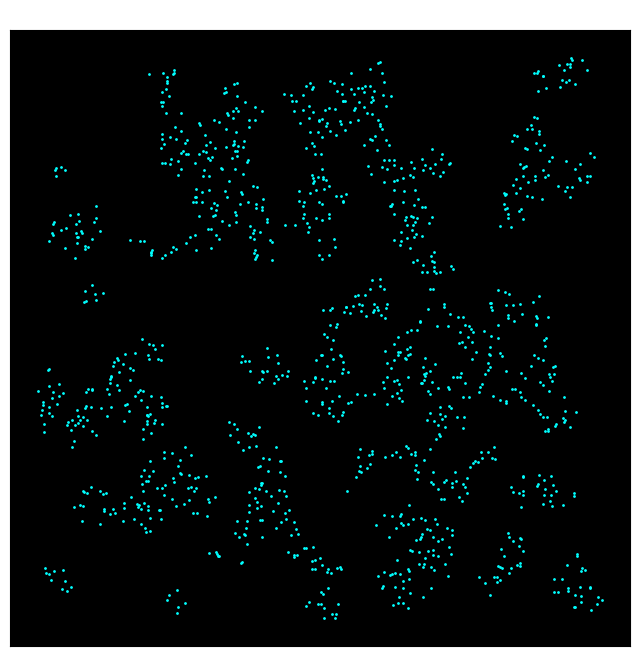

In [113]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.spatial import Delaunay, distance_matrix
from scipy.sparse.csgraph import minimum_spanning_tree
from sklearn.neighbors import NearestNeighbors

# Generate random "galaxies"
N = 2500
points = np.random.rand(N, 2)

# Compute minimum spanning tree
dist = distance_matrix(points, points)
mst = minimum_spanning_tree(dist).toarray()

# Plot MST (thread-like structure)
fig, ax = plt.subplots(figsize=(8, 8))
ax.scatter(points[:, 0], points[:, 1], s=1, color='cyan')
ax.set_facecolor("black")
ax.set_xticks([]); ax.set_yticks([])
plt.show()

k = 30
nbrs = NearestNeighbors(n_neighbors=k).fit(points)
distances, _ = nbrs.kneighbors(points)
avg_dist = distances[:, 1:].mean(axis=1)  # skip self (distance 0)

# Keep only central galaxies (below a distance threshold)
threshold = np.percentile(avg_dist, 50)  # keep central 50%
mask = avg_dist < threshold
central_points = points[mask]

# Plot central structure only
fig, ax = plt.subplots(figsize=(8, 8))
tri = Delaunay(central_points)
#ax.triplot(central_points[:, 0], central_points[:, 1], tri.simplices, color='white', alpha=0.5)
ax.scatter(central_points[:, 0], central_points[:, 1], s=1, color='cyan')
ax.set_facecolor("black")
ax.set_xticks([]); ax.set_yticks([])
ax.set_title("Filtered Central Galaxies", color='white')
plt.show()

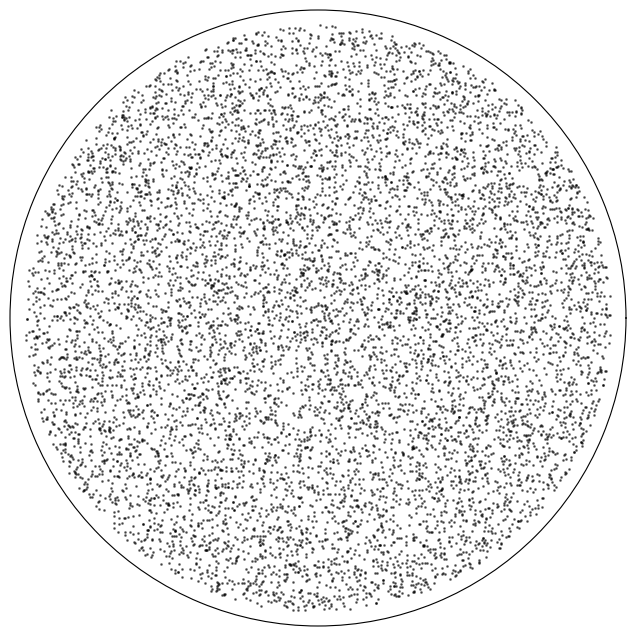

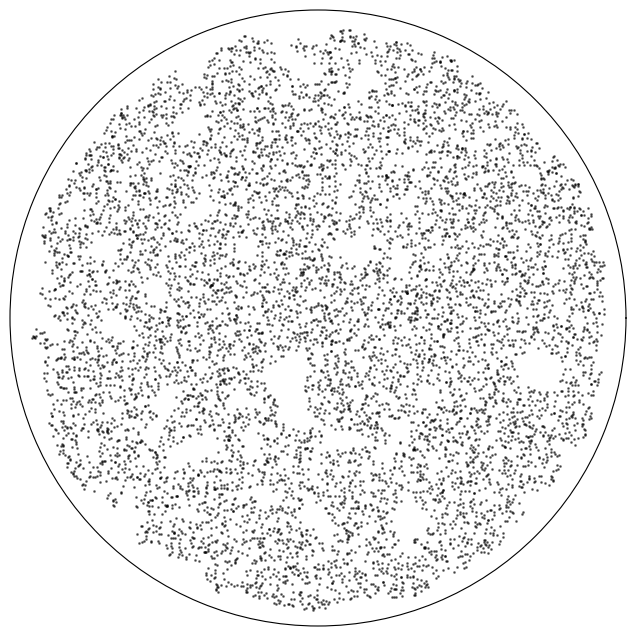

In [114]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.spatial import distance_matrix
from scipy.sparse.csgraph import minimum_spanning_tree

np.random.seed(0)

# Step 1: Generate random polar coordinates
N = 10000

r = np.random.rand(N) ** 0.5  # Bias toward center (sqrt distribution)
theta = 2 * np.pi * np.random.rand(N)

# Step 2: Convert to Cartesian for MST
x = r * np.cos(theta)
y = r * np.sin(theta)
points = np.vstack([x, y]).T

# Step 3: Compute MST
dist = distance_matrix(points, points)
mst = minimum_spanning_tree(dist).toarray()

# Step 4: Plot in polar coordinates
fig = plt.figure(figsize=(8, 8))
ax = fig.add_subplot(111, polar=True)
#ax.set_facecolor("black")


# Plot galaxies (just points)
r_points = np.linalg.norm(points, axis=1)
theta_points = np.arctan2(points[:, 1], points[:, 0])
ax.scatter(theta_points, r_points, s=1, alpha=0.5, color='black')
ax.grid(False)
ax.set_xticks([]); ax.set_yticks([])
plt.show()

# Step 2: Estimate local density using k-nearest neighbors
k = 50
nbrs = NearestNeighbors(n_neighbors=k).fit(points)
distances, _ = nbrs.kneighbors(points)
density = 1 / distances[:, 1:].mean(axis=1)

# Step 3: Keep only densest X% of galaxies
keep_fraction = 0.9  # Keep central 50%
threshold = np.percentile(density, 100 * (1 - keep_fraction))
mask = density > threshold
filtered_points = points[mask]

# Step 4: Compute MST only on filtered points
dist = distance_matrix(filtered_points, filtered_points)
mst = minimum_spanning_tree(dist).toarray()

# Convert filtered points to polar
r_points = np.linalg.norm(filtered_points, axis=1)
theta_points = np.arctan2(filtered_points[:, 1], filtered_points[:, 0])

# Step 5: Plot
fig = plt.figure(figsize=(8, 8))
ax = fig.add_subplot(111, polar=True)
#ax.set_facecolor("black")

# Plot points
ax.scatter(theta_points, r_points, s=1, alpha=0.5, color='black')
ax.grid(False)
ax.set_xticks([]); ax.set_yticks([])
plt.show()

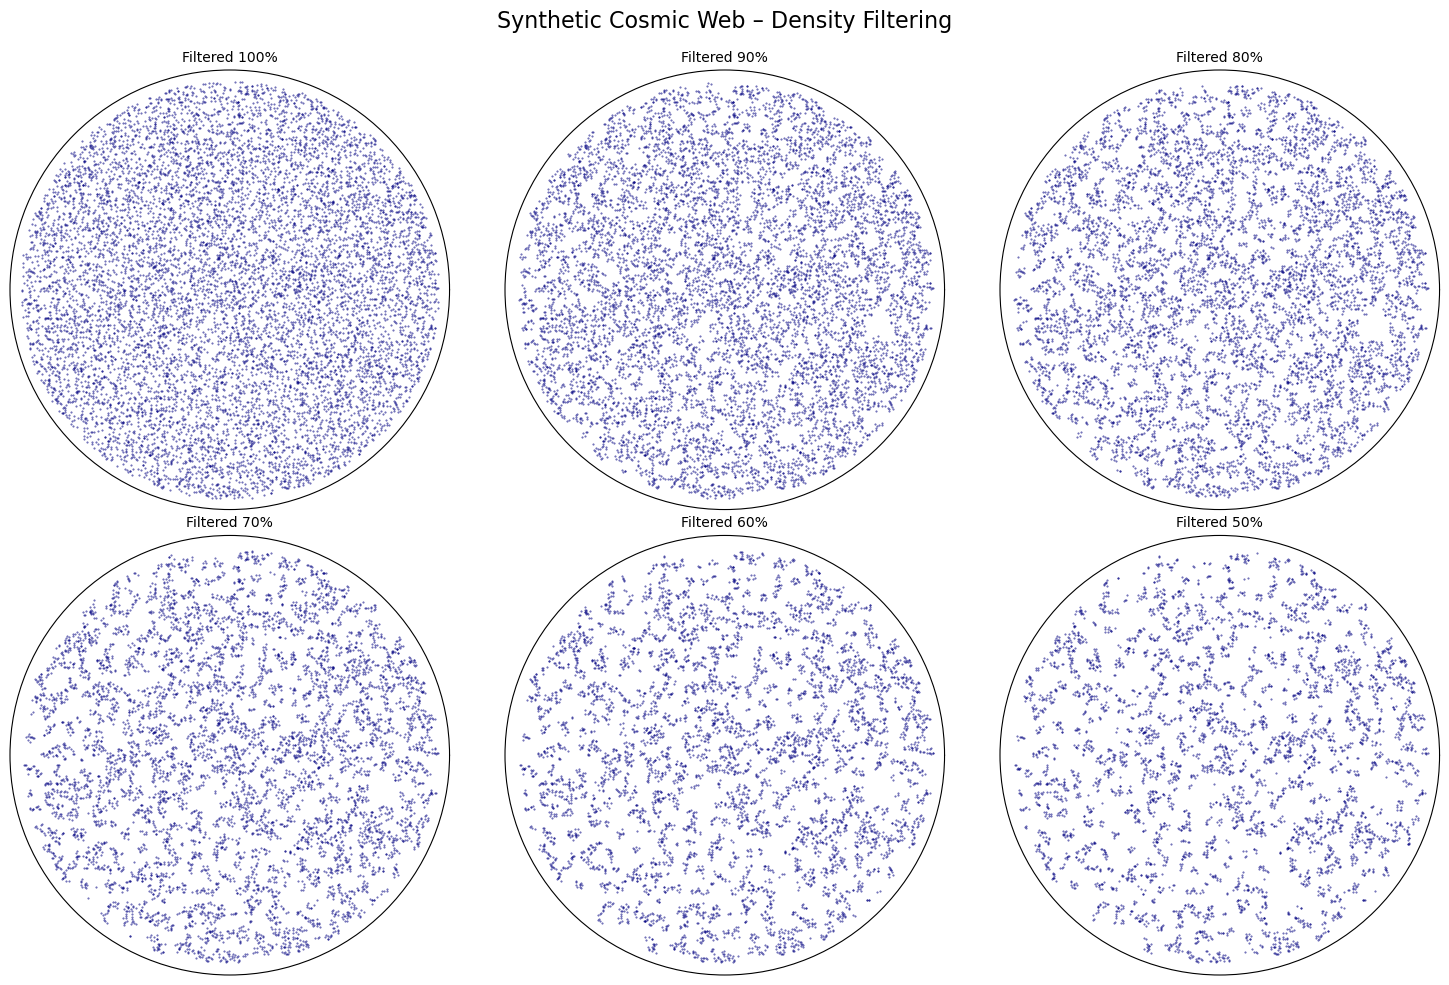

In [115]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.neighbors import NearestNeighbors

np.random.seed(0)

# 1. Generate polar coordinates
N = 10000
r = np.random.rand(N) ** 0.5  # central concentration
theta = 2 * np.pi * np.random.rand(N)

# Convert to Cartesian for analysis
x = r * np.cos(theta)
y = r * np.sin(theta)
points = np.vstack([x, y]).T

# 2. Estimate local density
k = 10
nbrs = NearestNeighbors(n_neighbors=k).fit(points)
distances, _ = nbrs.kneighbors(points)
density = 1 / distances[:, 1:].mean(axis=1)

# 3. Define filter levels
levels = [100, 90, 80, 70, 60, 50]  # percentiles

# 4. Setup plot
fig, axes = plt.subplots(2, 3, figsize=(15, 10), subplot_kw={'projection': 'polar'})
axes = axes.flatten()

for i, level in enumerate(levels):
    ax = axes[i]
    
    threshold = np.percentile(density, 100 - level)
    mask = density > threshold
    
    r_plot = np.linalg.norm(points[mask], axis=1)
    theta_plot = np.arctan2(points[mask][:,1], points[mask][:,0])
    
    ax.scatter(theta_plot, r_plot, s=0.2, color='navy', alpha=0.7)
    ax.set_title(f"Filtered {level}%", fontsize=10)
    ax.set_facecolor('white')
    ax.set_xticks([]); ax.set_yticks([])

fig.suptitle("Synthetic Cosmic Web – Density Filtering", fontsize=16)
plt.tight_layout()
plt.subplots_adjust(top=0.92)
plt.show()


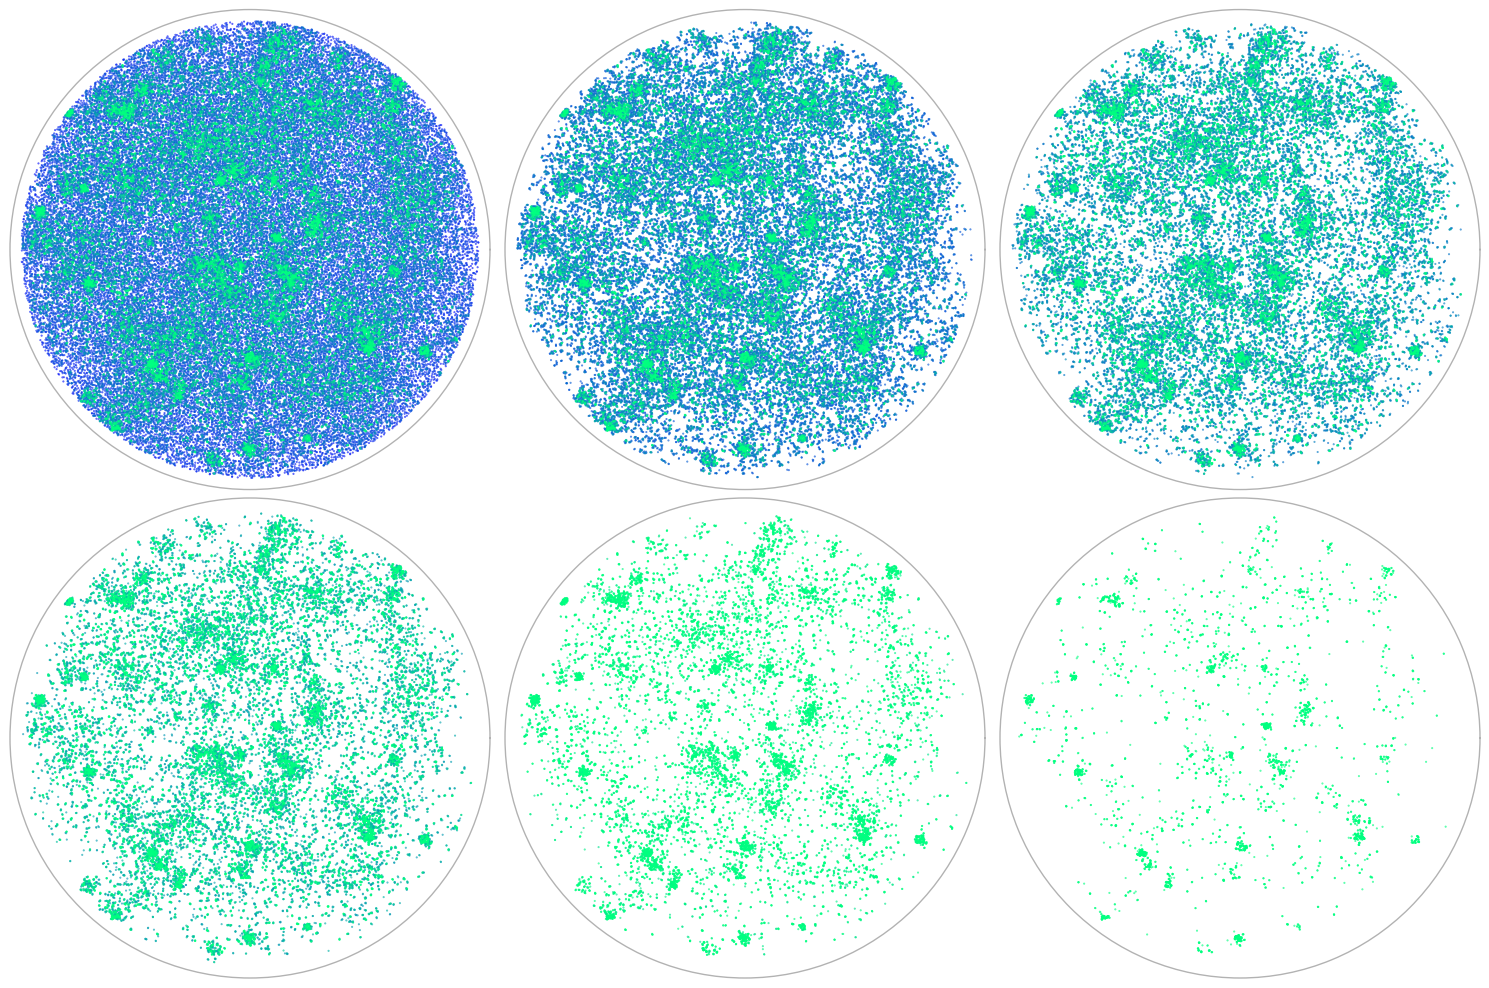

In [123]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.neighbors import NearestNeighbors

# Parameters
N_CLUMPS = 1000
POINTS_RANGE = (1, 200)     # Each clump has this many points
SPREAD_RANGE = (0.01, 0.3)   # Clump "size"
MAX_RADIUS = 1.0

points = []

# Generate clumps with variable size and population
for _ in range(N_CLUMPS):
    while True:
        cx, cy = np.random.uniform(-1, 1, size=2)
        if np.sqrt(cx**2 + cy**2) < MAX_RADIUS:
            break
    
    n_points = np.random.randint(*POINTS_RANGE)
    spread = np.random.uniform(*SPREAD_RANGE)
    
    x = np.random.normal(cx, spread, n_points)
    y = np.random.normal(cy, spread, n_points)
    
    # Only keep points within the unit circle
    mask = np.sqrt(x**2 + y**2) < MAX_RADIUS
    clump_points = np.vstack([x[mask], y[mask]]).T
    points.append(clump_points)

points = np.vstack(points)

# Compute local density via k-nearest neighbors
k = 6
nbrs = NearestNeighbors(n_neighbors=k).fit(points)
distances, _ = nbrs.kneighbors(points)
density = 1 / distances[:, 1:].mean(axis=1)
weights = density / np.median(density)

# Filtering levels
levels = [100, 80, 60, 40, 20, 5]

# Plotting
fig, axes = plt.subplots(2, 3, figsize=(15, 10), subplot_kw={'projection': 'polar'})
axes = axes.flatten()

for i, level in enumerate(levels):
    ax = axes[i]
    
    threshold = np.percentile(density, 100 - level)
    mask = density > threshold
    
    r_plot = np.linalg.norm(points[mask], axis=1)
    theta_plot = np.arctan2(points[mask][:, 1], points[mask][:, 0])
    cmap = weights[mask]**2

    ax.scatter(theta_plot, r_plot, c=cmap, s=0.25, alpha=0.7, vmin=0, vmax=2, cmap='winter')
    ax.set_facecolor('white')
    ax.set_xticks([]); ax.set_yticks([])
    plt.setp(ax.spines.values(), lw=1, color='black', alpha=0.3)
plt.tight_layout()
plt.show()
